# TTFT GPT2 64 prompt length


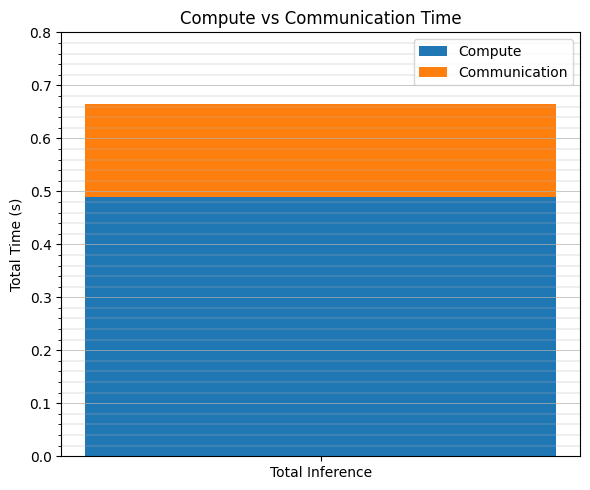

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSVs
csv1 = "/media/ssd/AgentMesh/logs/gpt2/TTFT/64/device1.csv" 
csv2 = "/media/ssd/AgentMesh/logs/gpt2/TTFT/64/device2.csv"  

df1 = pd.read_csv(csv1)
df2 = pd.read_csv(csv2)

# Concatenate both DataFrames
df = pd.concat([df1, df2], ignore_index=True)

# Group by Type and sum times
summary = df.groupby("Type")["Time"].sum()

compute_time = summary.get("Compute", 0)
comm_time = summary.get("Communication", 0)

# Plot stacked bar
fig, ax = plt.subplots(figsize=(6, 5))
ax.bar("Total Inference", compute_time, label="Compute")
ax.bar("Total Inference", comm_time, bottom=compute_time, label="Communication")

# Labels and legend
ax.set_ylabel("Total Time (s)")
ax.set_title("Compute vs Communication Time")
ax.legend()
plt.tight_layout()
ax.set_ylim(top=0.8)
ax.yaxis.grid(True, which='minor', linestyle='solid', linewidth=0.3)
ax.yaxis.grid(True, which='major', linestyle='solid', linewidth=0.5)
ax.minorticks_on()
plt.show()


# TTFT GPT2 : 64,128,256,512 input prompt lengths


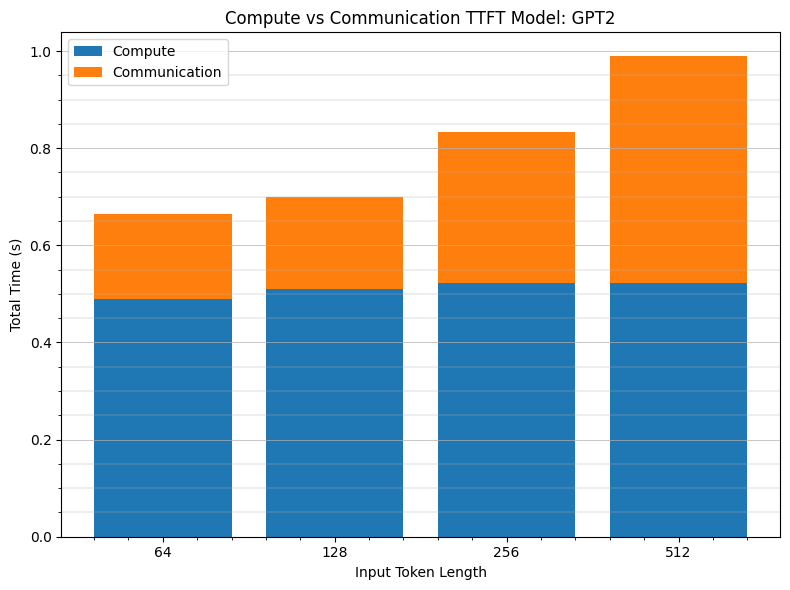

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# === Define all CSV paths: (device1, device2) for each token length ===
paths = {
    64: (
        "/media/ssd/AgentMesh/logs/gpt2/TTFT/64/device1.csv",
        "/media/ssd/AgentMesh/logs/gpt2/TTFT/64/device2.csv"
    ),
    128: (
        "/media/ssd/AgentMesh/logs/gpt2/TTFT/128/device1.csv",
        "/media/ssd/AgentMesh/logs/gpt2/TTFT/128/device2.csv"
    ),
    256: (
        "/media/ssd/AgentMesh/logs/gpt2/TTFT/256/device1.csv",
        "/media/ssd/AgentMesh/logs/gpt2/TTFT/256/device2.csv"
    ),
    512: (
        "/media/ssd/AgentMesh/logs/gpt2/TTFT/512/device1.csv",
        "/media/ssd/AgentMesh/logs/gpt2/TTFT/512/device2.csv"
    )
}

# === Storage for bar values ===
token_lengths = []
compute_times = []
comm_times = []

# === Load, process each token length ===
for tok_len, (csv1, csv2) in paths.items():
    df1 = pd.read_csv(csv1)
    df2 = pd.read_csv(csv2)
    df = pd.concat([df1, df2], ignore_index=True)
    
    summary = df.groupby("Type")["Time"].sum()
    compute_time = summary.get("Compute", 0)
    comm_time = summary.get("Communication", 0)

    token_lengths.append(str(tok_len))
    compute_times.append(compute_time)
    comm_times.append(comm_time)

# === Plotting ===
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(token_lengths, compute_times, label="Compute")
ax.bar(token_lengths, comm_times, bottom=compute_times, label="Communication")

ax.set_ylabel("Total Time (s)")
ax.set_xlabel("Input Token Length")
ax.set_title("Compute vs Communication TTFT Model: GPT2")
ax.legend()

ax.yaxis.grid(True, which='minor', linestyle='solid', linewidth=0.3)
ax.yaxis.grid(True, which='major', linestyle='solid', linewidth=0.5)
ax.minorticks_on()
plt.tight_layout()
plt.show()


# Updated TTFT (Without sending KV cache)  Model: GPT2

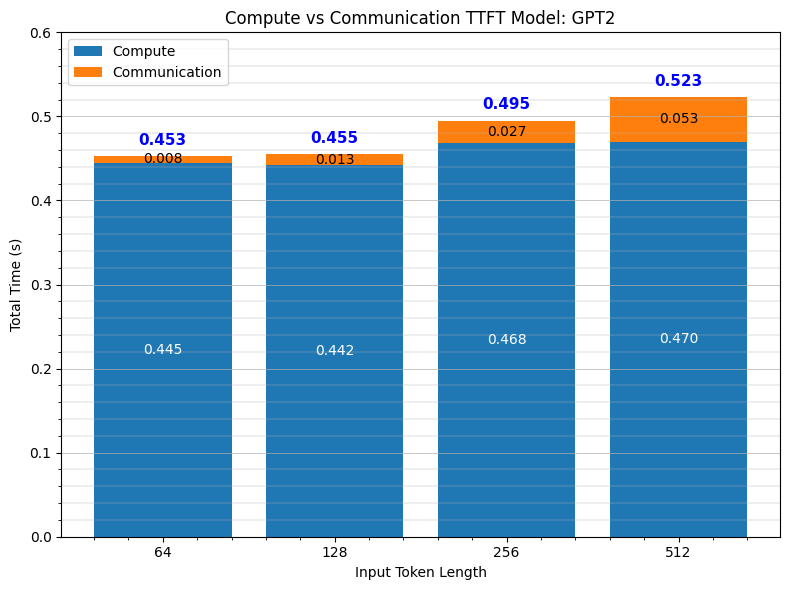

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# === Define all CSV paths: (device1, device2) for each token length ===
paths = {
    64: (
        "/media/ssd/AgentMesh/logs/gpt2/TTFT/64/device1.csv",
        "/media/ssd/AgentMesh/logs/gpt2/TTFT/64/device2.csv"
    ),
    128: (
        "/media/ssd/AgentMesh/logs/gpt2/TTFT/128/device1.csv",
        "/media/ssd/AgentMesh/logs/gpt2/TTFT/128/device2.csv"
    ),
    256: (
        "/media/ssd/AgentMesh/logs/gpt2/TTFT/256/device1.csv",
        "/media/ssd/AgentMesh/logs/gpt2/TTFT/256/device2.csv"
    ),
    512: (
        "/media/ssd/AgentMesh/logs/gpt2/TTFT/512/device1.csv",
        "/media/ssd/AgentMesh/logs/gpt2/TTFT/512/device2.csv"
    )
}

# === Storage for bar values ===
token_lengths = []
compute_times = []
comm_times = []

# === Load, process each token length ===
for tok_len, (csv1, csv2) in paths.items():
    df1 = pd.read_csv(csv1)
    df2 = pd.read_csv(csv2)
    df = pd.concat([df1, df2], ignore_index=True)
    
    summary = df.groupby("Type")["Time"].sum()
    compute_time = summary.get("Compute", 0)
    comm_time = summary.get("Communication", 0)

    token_lengths.append(str(tok_len))
    compute_times.append(compute_time)
    comm_times.append(comm_time)

# === Plotting ===
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_ylim(top=0.6)
ax.bar(token_lengths, compute_times, label="Compute")
ax.bar(token_lengths, comm_times, bottom=compute_times, label="Communication")

ax.set_ylabel("Total Time (s)")

# Annotate each bar with its height value
for i, (x, c, comm) in enumerate(zip(token_lengths, compute_times, comm_times)):
    # Compute bar positions
    ax.text(x, c / 2, f"{c:.3f}", ha='center', va='center', color='white', fontsize=10)
    ax.text(x, c + comm / 2, f"{comm:.3f}", ha='center', va='center', color='black', fontsize=10)
    # Annotate total height on top of the stacked bar
    total = c + comm
    ax.text(x, total + 0.01, f"{total:.3f}", ha='center', va='bottom', color='blue', fontsize=11, fontweight='bold')
ax.set_xlabel("Input Token Length")
ax.set_title("Compute vs Communication TTFT Model: GPT2")
ax.legend()

ax.yaxis.grid(True, which='minor', linestyle='solid', linewidth=0.3)
ax.yaxis.grid(True, which='major', linestyle='solid', linewidth=0.5)
ax.minorticks_on()
plt.tight_layout()
plt.show()
fig.savefig("TTFT_comp2comm.png", dpi=600, bbox_inches='tight')
